<a href="https://colab.research.google.com/github/Sahana-D-01/Disaster-And-Crisis-Mapping-System/blob/main/Disaster_mapping.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
! pip install kaggle

In [ ]:
! mkdir ~/.kaggle

In [ ]:
! cp /content/drive/MyDrive/Kaggle/kaggle.json ~/.kaggle/

In [ ]:
! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
! kaggle competitions download nlp-getting-started

In [ ]:
ls

drive/  sample_data/  sample_submission.csv  test.csv  train.csv


In [ ]:
import csv
import pandas as pd
import re
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# optional execution
with open('train.csv', 'r') as file:
    reader = csv.reader(file)
    for row in reader:
      print(row)

Streaming output truncated to the last 5000 lines.
['3750', 'destruction', 'All Around the World', 'How can we help save a beautiful town in Ontario from destruction by a power plant developer?\nhttp://t.co/hlD5xLYwBn', '0']
['3752', 'destruction', '', 'Crackdown 3 Destruction Restricted to Multiplayer: Crackdown 3 impressed earlier this week with a demonstratio... http://t.co/LMWKjsYCgj', '0']
['3753', 'destruction', 'Valle Del Sol', '@DanHRothschild Greed is the fuel of self-destruction. #Takecare', '0']
['3754', 'destruction', 'Georgia, USA', '@cinla1964 @windowgatribble The Contrasts of Foreboding destruction enhanced by Expansive divisions of color saturation contrast and hue!', '0']
['3756', 'destruction', 'New York NYC', "Russian authorities to take account of petition against destruction of sanctioned food: Vladimir Putin's press... http://t.co/QbMcSJaVt0", '0']
['3758', 'destruction', '', 'Fall back this first break homebuyer miscalculation that could destruction thousands: Mw

In [ ]:
#converting csv file into pandas dataframe
train_data = pd.read_csv('train.csv')

## Module 1 (Pre-processing Tweets):
*   Hashtag Extraction using Regex
*   Text-Cleaning (URLs, Mentions, etc.)
*   Tokenization, Removal of Digits, Stop Words and Punctuations

In [ ]:
#\w stands for "word character", usually [A-Za-z0-9_]
train_data['hashtag'] = train_data['text'].apply(lambda x: re.findall(r"#(\w+)", x))

In [ ]:
display(train_data)

,id,keyword,location,text,target,hashtag
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1,[earthquake]
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1,[]
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1,[]
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1,[wildfires]
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1,"[Alaska, wildfires]"
...,...,...,...,...,...,...
7608,10869,NaN,NaN,Two giant cranes holding a bridge collapse int...,1,[]
7609,10870,NaN,NaN,@aria_ahrary @TheTawniest The out of control w...,1,[]
7610,10871,NaN,NaN,M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...,1,[]
7611,10872,NaN,NaN,Police investigating after an e-bike collided ...,1,[]


In [ ]:
#installing ekphrasis
!pip install ekphrasis

     |████████████████████████████████| 80 kB 5.9 MB/s 
     |████████████████████████████████| 43 kB 2.0 MB/s 
     |████████████████████████████████| 64 kB 2.6 MB/s 
  Created wheel for ekphrasis: filename=ekphrasis-0.5.1-py3-none-any.whl size=82842 sha256=5acd175da8bd116f56636b06975dc3b387f1afdda2bf2d8b953dc76f709625cf
  Stored in directory: /root/.cache/pip/wheels/f7/ec/0d/12659e32faf780546945d0120f2c8410eb3efb7426731da88f
  Created wheel for ftfy: filename=ftfy-6.0.3-py3-none-any.whl size=41933 sha256=d459fd60f495312ded9195adeeeafadd020cfcd6a6bdc940800a89a520eedbd2
  Stored in directory: /root/.cache/pip/wheels/19/f5/38/273eb3b5e76dfd850619312f693716ac4518b498f5ffb6f56d
Successfully built ekphrasis ftfy


In [ ]:
#installing tweet-preprocessor
!pip install tweet-preprocessor

In [ ]:
import preprocessor as p
#forming a separate feature for cleaned tweets
for i,v in enumerate(train_data['text']):
    train_data.loc[i,'cleaned'] = p.clean(v) 

In [ ]:
#important libraries for preprocessing using NLTK
import nltk
from nltk import word_tokenize, FreqDist
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
nltk.download
nltk.download('wordnet')
nltk.download('stopwords')
from nltk.tokenize import TweetTokenizer

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
display(train_data)

,id,keyword,location,text,target,hashtag,cleaned
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1,[earthquake],Our Deeds are the Reason of this May ALLAH For...
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1,[],Forest fire near La Ronge Sask. Canada
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1,[],All residents asked to 'shelter in place' are ...
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1,[wildfires],people receive evacuation orders in California
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1,"[Alaska, wildfires]",Just got sent this photo from Ruby as smoke fr...
...,...,...,...,...,...,...,...
7608,10869,NaN,NaN,Two giant cranes holding a bridge collapse int...,1,[],Two giant cranes holding a bridge collapse int...
7609,10870,NaN,NaN,@aria_ahrary @TheTawniest The out of control w...,1,[],The out of control wild fires in California ev...
7610,10871,NaN,NaN,M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...,1,[],M1.94 [01:04 UTC]?5km S of Volcano Hawaii.
7611,10872,NaN,NaN,Police investigating after an e-bike collided ...,1,[],Police investigating after an e-bike collided ...


In [ ]:
train_data['cleaned'] = train_data['cleaned'].astype(str).str.replace('\d+', '')
#train_data['cleaned'] = train_data['cleaned'].str.lower()

In [ ]:
def preprocess_data(data):
 #removes numbers
 data = data.astype(str).str.replace('\d+', '')
 #train_data['cleaned'] = data.str.lower()
 #data = data.str.lower()
 lemmatizer = nltk.stem.WordNetLemmatizer()
 w_tokenizer =  TweetTokenizer()
 
 def lemmatize_text(text):
  return [(lemmatizer.lemmatize(w)) for w \
                       in w_tokenizer.tokenize((text))]

 def remove_punctuation(words):
  new_words = []
  for word in words:
    new_word = re.sub(r'[^\w\s]', '', (word))
    if new_word != '':
        new_words.append(new_word)
  return new_words

 words = data.apply(lemmatize_text)
 words = words.apply(remove_punctuation)
 return pd.DataFrame(words)

In [ ]:
pre_tweets = preprocess_data(train_data['cleaned'])
train_data['cleaned'] = pre_tweets

In [ ]:
display(train_data)

,id,keyword,location,text,target,hashtag,cleaned
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1,[earthquake],"[Our, Deeds, are, the, Reason, of, this, May, ..."
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1,[],"[Forest, fire, near, La, Ronge, Sask, Canada]"
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1,[],"[All, resident, asked, to, shelter, in, place,..."
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1,[wildfires],"[people, receive, evacuation, order, in, Calif..."
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1,"[Alaska, wildfires]","[Just, got, sent, this, photo, from, Ruby, a, ..."
...,...,...,...,...,...,...,...
7608,10869,NaN,NaN,Two giant cranes holding a bridge collapse int...,1,[],"[Two, giant, crane, holding, a, bridge, collap..."
7609,10870,NaN,NaN,@aria_ahrary @TheTawniest The out of control w...,1,[],"[The, out, of, control, wild, fire, in, Califo..."
7610,10871,NaN,NaN,M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...,1,[],"[M, UTC, km, S, of, Volcano, Hawaii]"
7611,10872,NaN,NaN,Police investigating after an e-bike collided ...,1,[],"[Police, investigating, after, an, ebike, coll..."


# Module 2 (Relevancy Prediction; Naive Bayes algorithm)
*   Training Multinomial Naive Bayes Model
*   Predicting relevant disaster/ crime events

In [ ]:
#list containing tweets with all tokens joined
l = []
for lists in train_data['cleaned']:
  l.append(' '.join(lists))

In [ ]:
display(l)

['Our Deeds are the Reason of this May ALLAH Forgive u all',
 'Forest fire near La Ronge Sask Canada',
 'All resident asked to shelter in place are being notified by officer No other evacuation or shelter in place order are expected',
 'people receive evacuation order in California',
 'Just got sent this photo from Ruby a smoke from pours into a school',
 'Update California Hwy closed in both direction due to Lake County fire',
 'Heavy rain cause flash flooding of street in Manitou Colorado Springs area',
 'Im on top of the hill and I can see a fire in the wood',
 'Theres an emergency evacuation happening now in the building across the street',
 'Im afraid that the tornado is coming to our area',
 'Three people died from the heat wave so far',
 'Haha South Tampa is getting flooded hah WAIT A SECOND I LIVE IN SOUTH TAMPA WHAT AM I GONNA DO WHAT AM I GONNA DO FVCK',
 'or day Ive lost count',
 'in Bago Myanmar arrived Bago',
 'Damage to school bus on in multi car crash',
 'Whats up man',


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()
x = cv.fit_transform(l).toarray()

In [ ]:
display(x)
display(type(x))

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

numpy.ndarray

In [ ]:
#splitting train dataset into train and test
from sklearn.model_selection import train_test_split
train_text , test_text , train_target , test_target = train_test_split(x, train_data['target'], test_size=0.2, random_state=2020)

In [ ]:
print(type(train_text))

<class 'numpy.ndarray'>


In [ ]:
display(train_data)

,id,keyword,location,text,target,hashtag,cleaned
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1,[earthquake],"[Our, Deeds, are, the, Reason, of, this, May, ..."
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1,[],"[Forest, fire, near, La, Ronge, Sask, Canada]"
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1,[],"[All, resident, asked, to, shelter, in, place,..."
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1,[wildfires],"[people, receive, evacuation, order, in, Calif..."
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1,"[Alaska, wildfires]","[Just, got, sent, this, photo, from, Ruby, a, ..."
...,...,...,...,...,...,...,...
7608,10869,NaN,NaN,Two giant cranes holding a bridge collapse int...,1,[],"[Two, giant, crane, holding, a, bridge, collap..."
7609,10870,NaN,NaN,@aria_ahrary @TheTawniest The out of control w...,1,[],"[The, out, of, control, wild, fire, in, Califo..."
7610,10871,NaN,NaN,M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...,1,[],"[M, UTC, km, S, of, Volcano, Hawaii]"
7611,10872,NaN,NaN,Police investigating after an e-bike collided ...,1,[],"[Police, investigating, after, an, ebike, coll..."


In [ ]:
from sklearn.naive_bayes import MultinomialNB
model = MultinomialNB()
hist = model.fit(train_text, train_target)

In [ ]:
from sklearn import metrics
# Get predictions
model_pred = model.predict(test_text)

# Calculate the accuracy 
model_score = metrics.accuracy_score(test_target, model_pred)

print('NaiveBayes Model Score: ', model_score)

NaiveBayes Model Score:  0.7957977675640184


# Module 3 (Extracting Relevant Tweets based on the model’s prediction)
*   Relevant tweets are extracted from our model if their target value = 1

In [ ]:
display(model_pred) #display predictions
print(len(model_pred)) #number of tweets in test

array([0, 0, 1, ..., 1, 0, 0])

1523


In [ ]:
train_text1 , test_text1 , train_target1 , test_target1 = train_test_split(train_data, train_data['target'], test_size=0.2, random_state=2020)

In [ ]:
display(test_text[15])
display(type(test_text1))
# display(test_text1[15])

array([0, 0, 0, ..., 0, 0, 0])

pandas.core.frame.DataFrame

In [ ]:
 print(test_text1.columns.values.tolist())
 test_text_ncv = test_text1.values.tolist()
 print(type(test_text_ncv))
 print(test_text_ncv[0])

['id', 'keyword', 'location', 'text', 'target', 'hashtag', 'cleaned']
<class 'list'>
[264, 'ambulance', nan, '@fouseyTUBE you ok? Need a ambulance. Hahahah that was good! http://t.co/ZSbErqNN9n', 0, [], ['you', 'ok', 'Need', 'a', 'ambulance', 'Hahahah', 'that', 'wa', 'good']]


In [ ]:
#display number of relevant predictions
count = 0
for i in model_pred :
  if i == 1 :
    count += 1
print(count)

617


In [ ]:
#retrieve corresponding relevant tweets
index = 0
count = 0
rel_tweets = []
for i in model_pred :
  index += 1
  if i == 1 :
    rel_tweets.append(test_text_ncv[index][6])
    if test_text_ncv[index][4] == i:
      count = count + 1

In [ ]:
for tweet in rel_tweets :
  tweet = ' '.join(tweet).title()

In [ ]:
display(rel_tweets)

[['So',
  'this',
  'storm',
  'just',
  'came',
  'out',
  'of',
  'no',
  'where',
  ' ',
  'fuck',
  'me',
  'it',
  'cool'],
 ['Join',
  'the',
  'Providence',
  'Health',
  'Services',
  'team',
  'See',
  'our',
  'latest',
  'opening',
  'here',
  'CA'],
 ['Emergency',
  'unit',
  'simulate',
  'a',
  'chemical',
  'explosion',
  'at',
  'NU',
  'Evanston',
  'Now'],
 ['there', 'a', 'fire', 'truck', 'in', 'this', 'parking', 'lot'],
 ['Ral',
  'sends',
  'a',
  'message',
  'of',
  'condolence',
  'to',
  'Vietnam',
  'following',
  'natural',
  'disaster',
  'On',
  'behalf',
  'of',
  'the',
  'Cuban',
  'government',
  'an'],
 ['I',
  'want',
  'to',
  'see',
  'my',
  'so',
  'bad',
  'it',
  'not',
  'even',
  'funny',
  'I',
  'will',
  'probably',
  'cry',
  'and',
  'drowned',
  'him',
  'in',
  'kiss',
  'when',
  'I',
  'do'],
 ['Updated',
  'map',
  'with',
  'Mandatory',
  'Evacuation',
  'area',
  'red',
  'Advisory',
  'Evacuation',
  'yellow',
  'Evac',
  'Centers'

In [ ]:
print(count)

276


In [ ]:
for i in rel_tweets:
  print(i)

['So', 'this', 'storm', 'just', 'came', 'out', 'of', 'no', 'where', ' ', 'fuck', 'me', 'it', 'cool']
['Join', 'the', 'Providence', 'Health', 'Services', 'team', 'See', 'our', 'latest', 'opening', 'here', 'CA']
['Emergency', 'unit', 'simulate', 'a', 'chemical', 'explosion', 'at', 'NU', 'Evanston', 'Now']
['there', 'a', 'fire', 'truck', 'in', 'this', 'parking', 'lot']
['Ral', 'sends', 'a', 'message', 'of', 'condolence', 'to', 'Vietnam', 'following', 'natural', 'disaster', 'On', 'behalf', 'of', 'the', 'Cuban', 'government', 'an']
['I', 'want', 'to', 'see', 'my', 'so', 'bad', 'it', 'not', 'even', 'funny', 'I', 'will', 'probably', 'cry', 'and', 'drowned', 'him', 'in', 'kiss', 'when', 'I', 'do']
['Updated', 'map', 'with', 'Mandatory', 'Evacuation', 'area', 'red', 'Advisory', 'Evacuation', 'yellow', 'Evac', 'Centers', 'green']
['Kach', 'wa', 'a', 'group', 'to', 'which', 'belonged', 'Baruch', 'Goldstein', 'a', 'mass', 'murderer', 'who', 'in', 'shot', 'and', 'killed', 'Palestinian', '_']
['my',

In [ ]:
print(rel_tweets[252])

['New', 'Expansion', 'Ideas', 'Bard', 'Class', 'Holy', 'Trinity']


# Module 4 (Location and Coordinates Identification):
*   Determining and extracting the location of crime and disaster events from the relevant tweets by using Geo-text
*   Identifying the geocode, latitudes, and longitudes of the event by geoparsing the location

In [ ]:
! pip install geotext

     |████████████████████████████████| 2.0 MB 24.6 MB/s 


In [ ]:
from geotext import GeoText

In [ ]:
list_of_places = []
for tweet in rel_tweets :
  list_of_places.append(GeoText(' '.join(tweet)))

In [ ]:
print("COUNTRIES WITH DISASTERS:")
for place in list_of_places :
  if len(place.countries) > 0 :
    print(place.countries)
print("\nCITIES WITH DISASTERS:")
for place in list_of_places :
  if len(place.cities) > 0 :
    print(place.cities)

COUNTRIES WITH DISASTERS:
['Vietnam']
['Iran']
['Japan']
['Brazil']
['Israel']
['Malaysia']
['Ireland']
['India']
['Malaysia']
['Cameroon']
['Japan']
['Saudi Arabia']
['Chile']
['Yemen']
['Iraq']
['Myanmar']
['Iran']
['Egypt']
['Malaysia']
['El Salvador']
['Iran']
['Cameroon']
['Philippines']
['Israel']
['Malaysia']
['United States']
['India']
['Malaysia']
['Jamaica']
['Ukraine']

CITIES WITH DISASTERS:
['Sydney']
['Washington']
['Bridgeport', 'Police']
['Evanston']
['Alice Springs']
['Portland']
['Nashville']
['Silver Spring']
['Washington']
['Saint John']
['Gallup']
['Cairo']
['Austin']
['Portland']
['San Jose']
['Brooklyn']
['San Bernardino']
['Police']
['Norfolk']
['Twentynine Palms']
['Salem']
['Boston']
['Rock Hill']
['Green']
['Johnson', 'Texas']
['Charlotte']
['Ontario']
['Edinburgh']
['Udhampur']
['Dublin']
['Montego Bay']
['Edinburgh']
['Oklahoma']
['Man']
['Police']
['Kiev']
['London', 'London']


In [ ]:
places = []
corresponding_tweets = []
i = 0
for place in list_of_places:
  if (len(place.countries) > 0):
    places.append(place.countries)
    corresponding_tweets.append(' '.join(rel_tweets[i]))

  if (len(place.cities) > 0):
    places.append(place.cities)
    corresponding_tweets.append(' '.join(rel_tweets[i]))
  
  i = i + 1

In [ ]:
print(places)
print(corresponding_tweets)

[['Vietnam'], ['Sydney'], ['Iran'], ['Japan'], ['Brazil'], ['Washington'], ['Bridgeport', 'Police'], ['Evanston'], ['Alice Springs'], ['Israel'], ['Malaysia'], ['Portland'], ['Nashville'], ['Ireland'], ['Silver Spring'], ['India'], ['Malaysia'], ['Cameroon'], ['Japan'], ['Washington'], ['Saudi Arabia'], ['Chile'], ['Saint John'], ['Gallup'], ['Cairo'], ['Austin'], ['Yemen'], ['Portland'], ['Iraq'], ['San Jose'], ['Brooklyn'], ['San Bernardino'], ['Police'], ['Norfolk'], ['Twentynine Palms'], ['Salem'], ['Myanmar'], ['Iran'], ['Boston'], ['Rock Hill'], ['Egypt'], ['Green'], ['Johnson', 'Texas'], ['Charlotte'], ['Malaysia'], ['Ontario'], ['Edinburgh'], ['El Salvador'], ['Udhampur'], ['Dublin'], ['Montego Bay'], ['Iran'], ['Cameroon'], ['Philippines'], ['Israel'], ['Malaysia'], ['United States'], ['Edinburgh'], ['India'], ['Oklahoma'], ['Malaysia'], ['Jamaica'], ['Man'], ['Police'], ['Ukraine'], ['Kiev'], ['London', 'London']]
['Ral sends a message of condolence to Vietnam following natur

In [ ]:
df = pd.DataFrame(list(zip(places, corresponding_tweets)),
               columns =['Locations_List', 'Tweets'])

In [ ]:
display(df)

,Locations_List,Tweets
0,[Vietnam],Ral sends a message of condolence to Vietnam f...
1,[Sydney],Middle of winter in Sydney we have had snow bu...
2,[Iran],I think bombing Iran would be kinder
3,[Japan],My grandfather wa set to be in the first group...
4,[Brazil],Hiroshima survivor fight nuclear industry in B...
...,...,...
62,[Man],Roger Goodells Fatal Mistake Tom Brady An Inno...
63,[Police],DISASTER AVERTED Police kill gunman with hoax ...
64,[Ukraine],Ukraine argues for US weapon during Pelosis vi...
65,[Kiev],Ukraine argues for US weapon during Pelosis vi...


In [ ]:
df['Location'] = df.Locations_List.apply(' '.join)

In [ ]:
display(df)

,Locations_List,Tweets,Location
0,[Vietnam],Ral sends a message of condolence to Vietnam f...,Vietnam
1,[Sydney],Middle of winter in Sydney we have had snow bu...,Sydney
2,[Iran],I think bombing Iran would be kinder,Iran
3,[Japan],My grandfather wa set to be in the first group...,Japan
4,[Brazil],Hiroshima survivor fight nuclear industry in B...,Brazil
...,...,...,...
62,[Man],Roger Goodells Fatal Mistake Tom Brady An Inno...,Man
63,[Police],DISASTER AVERTED Police kill gunman with hoax ...,Police
64,[Ukraine],Ukraine argues for US weapon during Pelosis vi...,Ukraine
65,[Kiev],Ukraine argues for US weapon during Pelosis vi...,Kiev


In [ ]:
 ! pip install geopy

In [ ]:
df['Code']=""
df['Lat']=""
df['Long']=""
df['Lat']=pd.to_numeric(df['Lat'],errors='coerce')
df['Long']=pd.to_numeric(df['Long'],errors='coerce')

In [ ]:
from geopy.geocoders import Nominatim
locator = Nominatim()
for ind in df.index:
  df['Code'][ind]=locator.geocode(df['Location'][ind])
  loc = locator.geocode(df['Location'][ind])
  df['Lat'][ind]=float(loc.latitude)
  df['Long'][ind]=float(loc.longitude)

/usr/local/lib/python3.7/dist-packages/geopy/geocoders/osm.py:143: UserWarning: Using Nominatim with the default "geopy/1.17.0" `user_agent` is strongly discouraged, as it violates Nominatim's ToS https://operations.osmfoundation.org/policies/nominatim/ and may possibly cause 403 and 429 HTTP errors. Please specify a custom `user_agent` with `Nominatim(user_agent="my-application")` or by overriding the default `user_agent`: `geopy.geocoders.options.default_user_agent = "my-application"`. In geopy 2.0 this will become an exception.
  UserWarning
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be s

In [ ]:
display(df)

,Locations_List,Tweets,Location,Code,Lat,Long
0,[Vietnam],Ral sends a message of condolence to Vietnam f...,Vietnam,"(Việt Nam, (13.2904027, 108.4265113))",13.290403,108.426511
1,[Sydney],Middle of winter in Sydney we have had snow bu...,Sydney,"(Sydney, North Sydney, New South Wales, Austra...",-33.854816,151.216454
2,[Iran],I think bombing Iran would be kinder,Iran,"(ایران, (32.6475314, 54.5643516))",32.647531,54.564352
3,[Japan],My grandfather wa set to be in the first group...,Japan,"(日本, (36.5748441, 139.2394179))",36.574844,139.239418
4,[Brazil],Hiroshima survivor fight nuclear industry in B...,Brazil,"(Brasil, (-10.3333333, -53.2))",-10.333333,-53.200000
...,...,...,...,...,...,...
62,[Man],Roger Goodells Fatal Mistake Tom Brady An Inno...,Man,"(Isle of Man, (54.1936805, -4.5591148))",54.193680,-4.559115
63,[Police],DISASTER AVERTED Police kill gunman with hoax ...,Police,"(Police, gmina Police, powiat policki, wojewód...",53.548643,14.565740
64,[Ukraine],Ukraine argues for US weapon during Pelosis vi...,Ukraine,"(Україна, (49.4871968, 31.2718321))",49.487197,31.271832
65,[Kiev],Ukraine argues for US weapon during Pelosis vi...,Kiev,"(Київ, Україна, (50.4500336, 30.5241361))",50.450034,30.524136


# Module 5 (Plotting Line Graph and Scatter Map):
*   Line graph determines the number of crime/ disaster events in each country/ city
*   Scatter map pin-points the location of the crime/ disaster event on a world map by using the lattitude/ longitude information from the previous module

In [ ]:
import plotly.graph_objects as go

In [ ]:
fig = go.Figure(data=go.Scattergeo(lon=df['Long'],lat=df['Lat'],mode='markers',marker=dict(size=6,color='rgb(255,0,0)')))
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0},geo=dict(landcolor = 'rgb(50,50,50)'),)
fig.show()

In [ ]:
df['Location'].value_counts()

Malaysia             5
Iran                 3
Cameroon             2
Edinburgh            2
Israel               2
Portland             2
Japan                2
Police               2
India                2
Washington           2
Yemen                1
United States        1
Boston               1
Egypt                1
Silver Spring        1
Salem                1
Philippines          1
Iraq                 1
Chile                1
Kiev                 1
Twentynine Palms     1
Green                1
Dublin               1
Ontario              1
Evanston             1
Johnson Texas        1
Udhampur             1
London London        1
Saint John           1
Charlotte            1
Jamaica              1
Myanmar              1
El Salvador          1
Brazil               1
San Jose             1
Nashville            1
Brooklyn             1
Ireland              1
Alice Springs        1
Saudi Arabia         1
Ukraine              1
Montego Bay          1
Austin               1
Rock Hill  

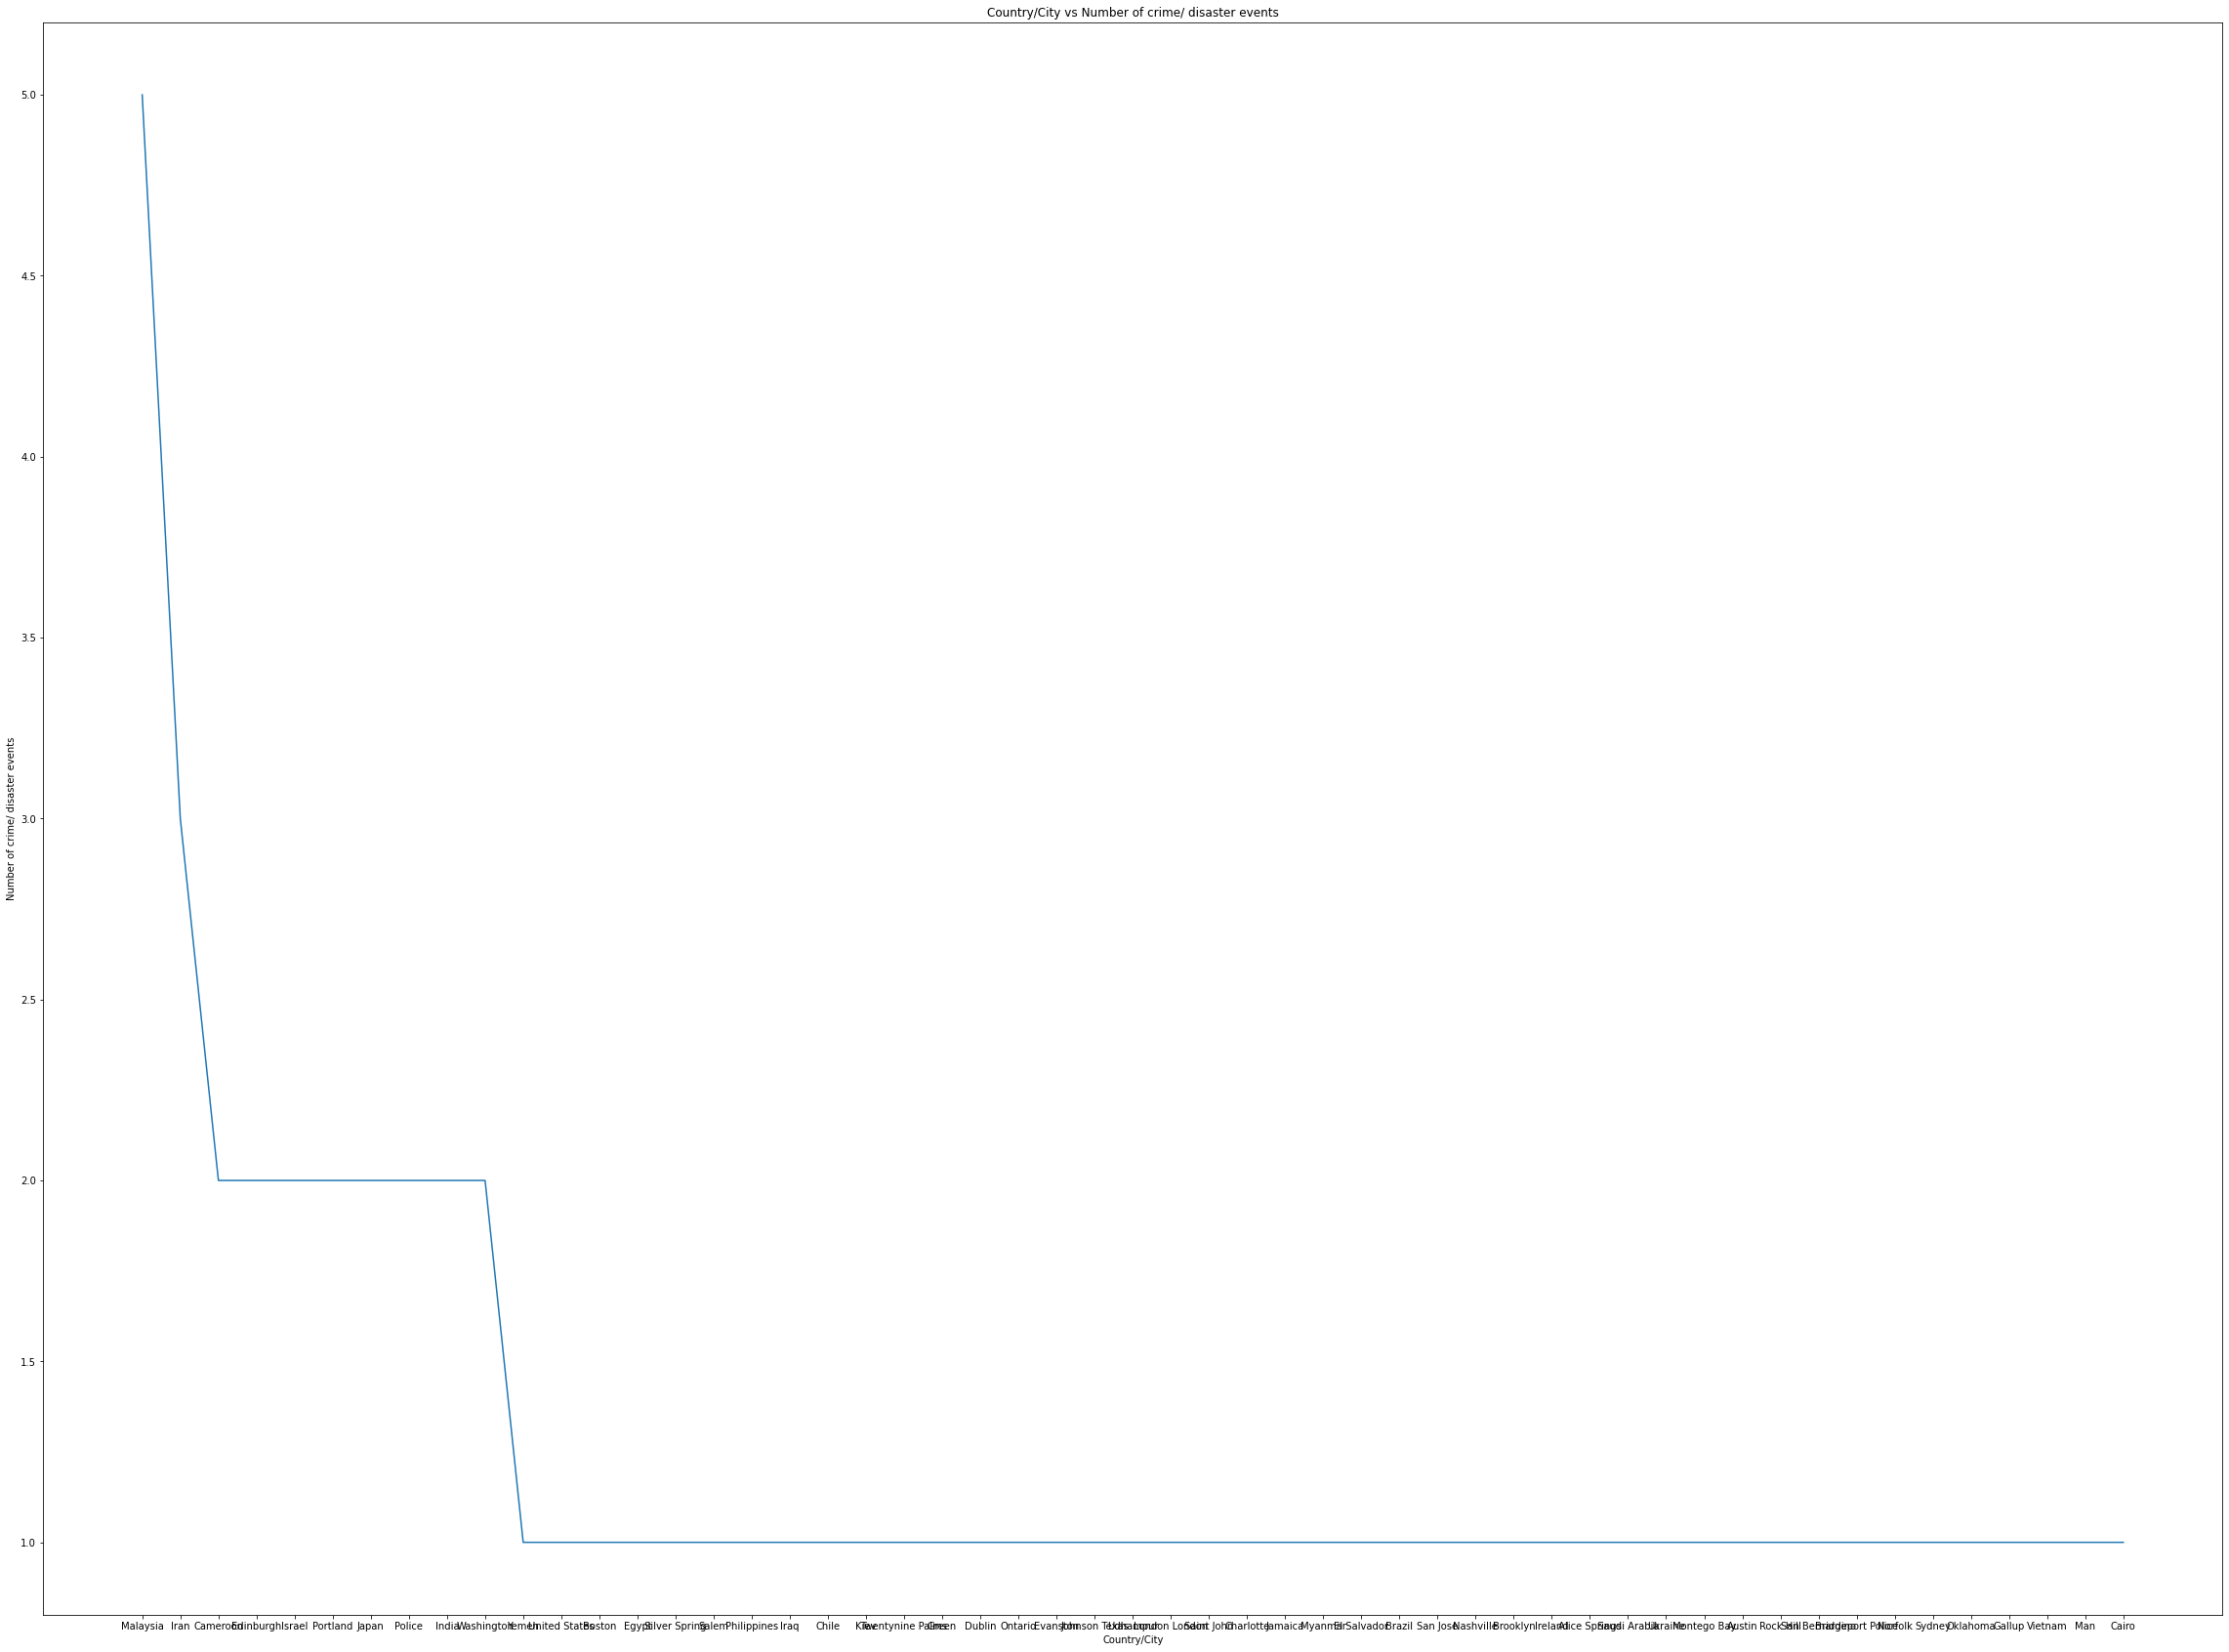

In [ ]:
# Set the width and height of the figure
plt.figure(figsize=(40,30))

# Line chart showing number of disaster/crime events in each country
graph = sns.lineplot(data=df['Location'].value_counts())
graph.set(xlabel ='Country/City', ylabel ='Number of crime/ disaster events')
plt.title('Country/City vs Number of crime/ disaster events');